In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC

In [4]:
df = pd.read_csv("neurolens_dataset.csv")

df.head(20)

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
5,Introvert,2.807173,6.326097,2.770085,5.617670,4.752116,0.302630,7.137657,5.399156,4.564805,...,3.888344,1.868406,9.188567,4.817574,3.427446,4.674632,4.027299,3.048724,2.774809,4.560962
6,Introvert,1.537468,7.605496,4.294666,9.166947,3.085335,1.042874,10.000000,5.899131,5.423302,...,7.906636,3.173683,9.458013,2.272047,5.218917,2.745851,4.056359,5.695608,3.230287,6.761266
7,Ambivert,6.636632,4.350586,7.131511,5.455061,2.530413,3.081656,5.177344,5.692996,3.951603,...,3.643867,7.601721,5.803109,5.024010,7.029383,6.990230,7.147859,4.680890,5.107637,7.246737
8,Extrovert,7.330318,2.820421,5.224400,5.053459,7.969032,9.106934,6.717555,7.061661,7.591541,...,4.459566,6.996722,5.980063,9.638288,5.509409,7.513645,8.788241,9.300327,8.086807,5.784908
9,Ambivert,5.377395,4.762184,4.244447,6.399885,4.781680,6.074592,10.000000,5.601565,4.927993,...,7.586472,5.513111,5.950501,2.328848,5.644438,6.251067,3.539273,5.698559,4.079389,6.609341


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

# Preprocessing

In [6]:
encoder = LabelEncoder()
df["personality_type"] = encoder.fit_transform(df["personality_type"])

In [7]:
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,1,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,0,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,0,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,1,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,2,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


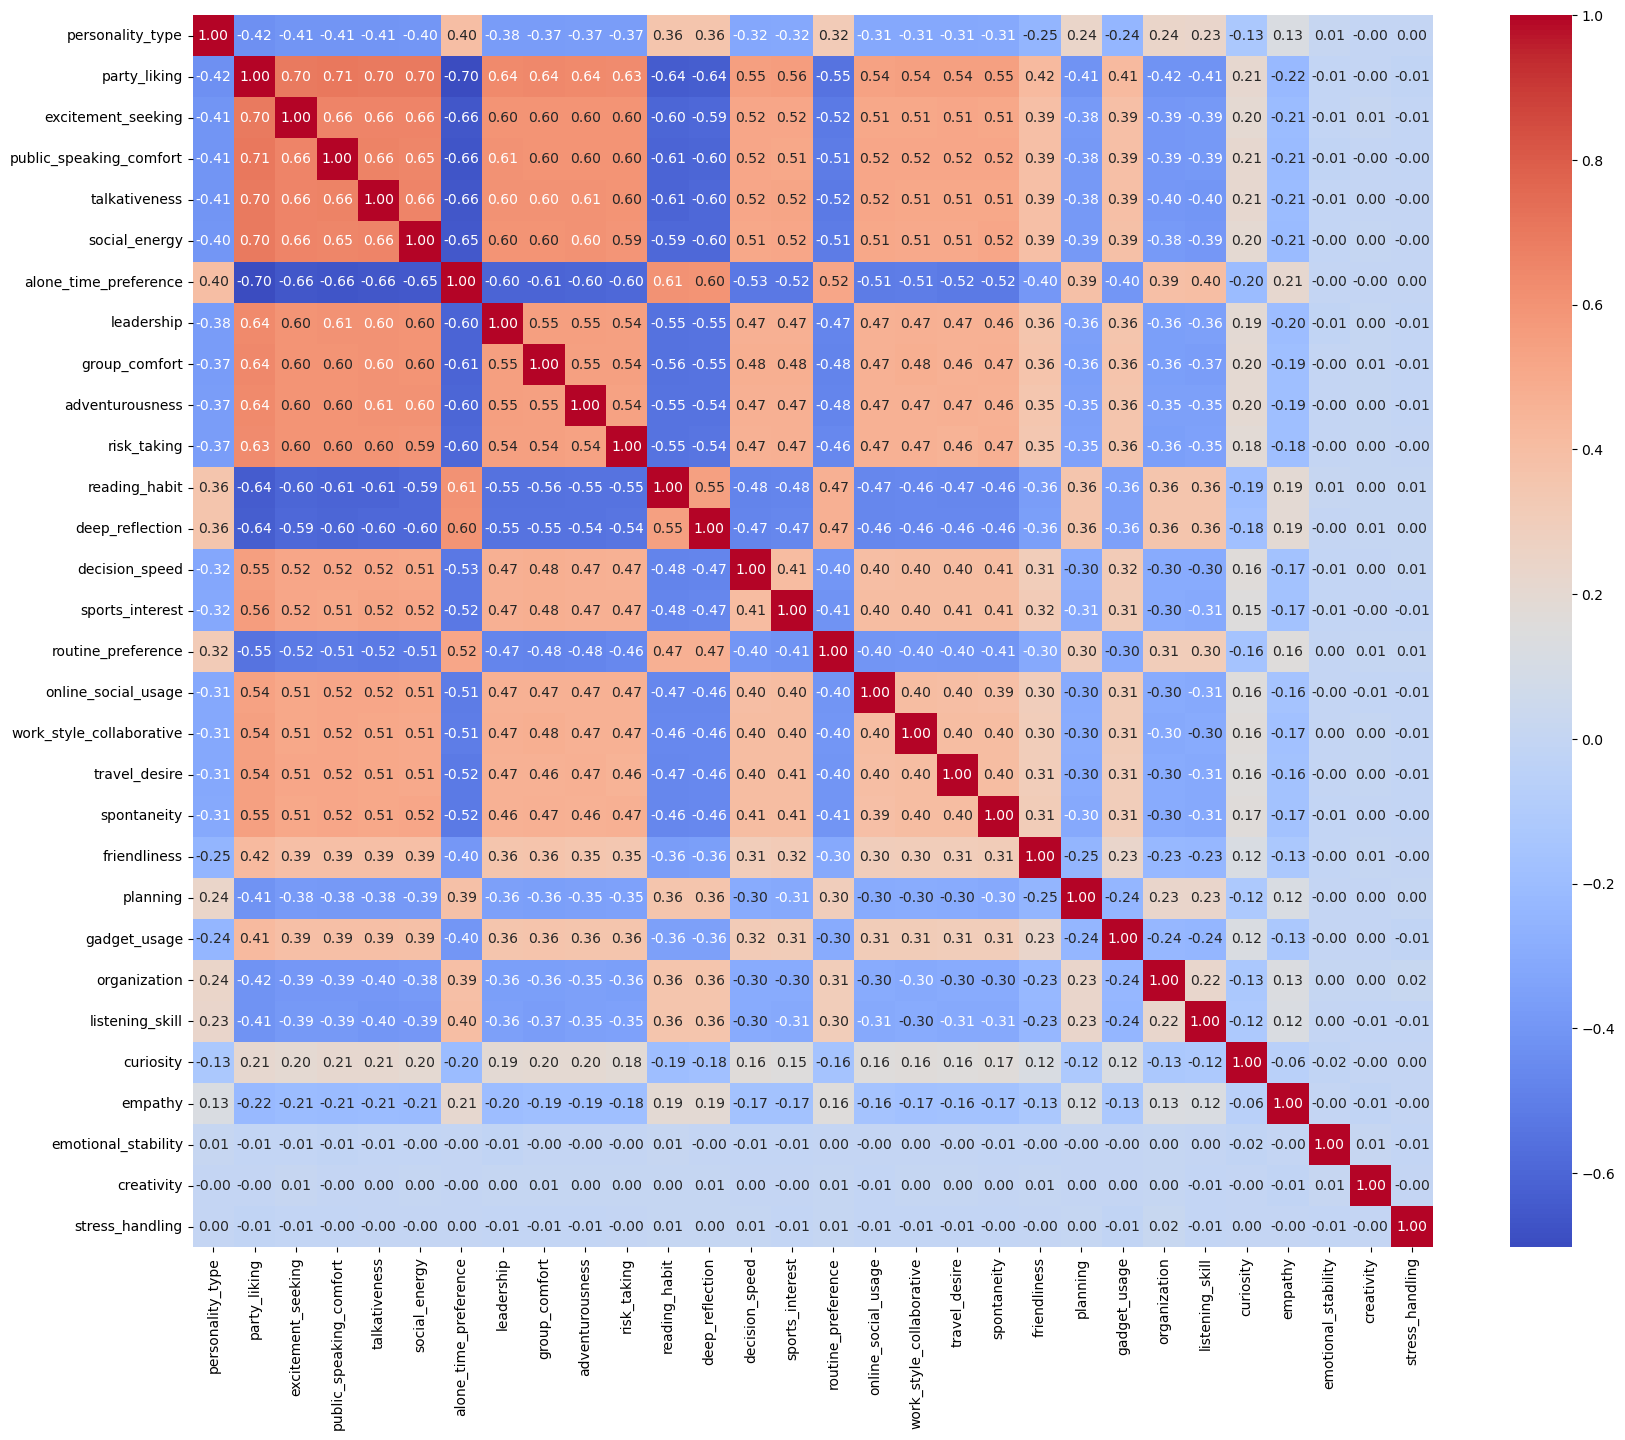

In [8]:
corr = df.corr()
corr_target = corr["personality_type"].abs().sort_values(ascending=False)
ordered_cols = corr_target.index.tolist()
corr_order = corr.loc[ordered_cols, ordered_cols]  # pakai corr yang asli
plt.figure(figsize=(20, 16))
sns.heatmap(corr_order , annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [9]:
unused_features = ["stress_handling", "creativity", "emotional_stability", "empathy"]
df = df.drop(columns=unused_features)

df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,organization,leadership,...,planning,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed
0,1,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,0.000000,8.486191,...,4.426422,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376
1,0,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,4.530322,6.214742,...,4.604019,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988
2,0,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,7.092078,3.034192,...,6.269467,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003
3,1,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,5.232694,10.000000,...,5.566069,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233
4,2,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.378051,4.452973,...,4.711944,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099


# Model Training

In [10]:
x = df.drop("personality_type", axis=1)
y = df["personality_type"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = SVC()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1612
           1       1.00      1.00      1.00      1770
           2       1.00      1.00      1.00      1618

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [11]:
x.columns

Index(['social_energy', 'alone_time_preference', 'talkativeness',
       'deep_reflection', 'group_comfort', 'party_liking', 'listening_skill',
       'organization', 'leadership', 'risk_taking', 'public_speaking_comfort',
       'curiosity', 'routine_preference', 'excitement_seeking', 'friendliness',
       'planning', 'spontaneity', 'adventurousness', 'reading_habit',
       'sports_interest', 'online_social_usage', 'travel_desire',
       'gadget_usage', 'work_style_collaborative', 'decision_speed'],
      dtype='object')

In [12]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']